<a href="https://colab.research.google.com/github/dasd412/my-first-ai/blob/main/LSTM_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input,train_target),(test_input,test_target)=imdb.load_data(num_words=300)
train_input,val_input, train_target,val_target=train_test_split(train_input,train_target,test_size=0.2,random_state=42)

17464789/17464789 [==============================] - 0s 0us/step


In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq=pad_sequences(train_input,maxlen=100)
val_seq=pad_sequences(val_input,maxlen=100)

In [5]:
from tensorflow import keras

model=keras.Sequential()
model.add(keras.layers.Embedding(300,16,input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [6]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           4800      
                                                                 
 lstm_1 (LSTM)               (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 5609 (21.91 KB)
Trainable params: 5609 (21.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 17s 44ms/step - loss: 0.6926 - accuracy: 0.5241 - val_loss: 0.6919 - val_accuracy: 0.5534
Epoch 2/100
  5/313 [..............................] - ETA: 10s - loss: 0.6911 - accuracy: 0.6031

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 13s 41ms/step - loss: 0.6913 - accuracy: 0.5681 - val_loss: 0.6903 - val_accuracy: 0.5806
Epoch 3/100
313/313 [==============================] - 14s 45ms/step - loss: 0.6888 - accuracy: 0.5913 - val_loss: 0.6871 - val_accuracy: 0.6036
Epoch 4/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6840 - accuracy: 0.6122 - val_loss: 0.6802 - val_accuracy: 0.6206
Epoch 5/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6739 - accuracy: 0.6319 - val_loss: 0.6655 - val_accuracy: 0.6460
Epoch 6/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6465 - accuracy: 0.6584 - val_loss: 0.6189 - val_accuracy: 0.6876
Epoch 7/100
313/313 [==============================] - 14s 45ms/step - loss: 0.5920 - accuracy: 0.6993 - val_loss: 0.5832 - val_accuracy: 0.7002
Epoch 8/100
313/313 [==============================] - 14s 45ms/step - loss: 0.5689 - accuracy: 0.7164 - val_loss: 0.5655 - val_accuracy: 0.71

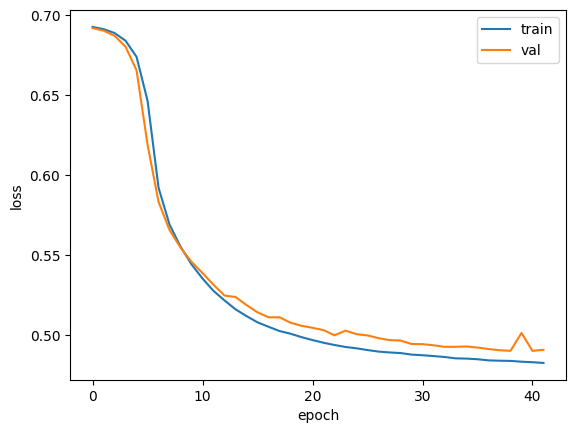

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('epoch')
plt.ylabel('loss')

plt.legend(['train','val'])

plt.show()


In [9]:
model2=keras.Sequential()
model2.add(keras.layers.Embedding(300,16,input_length=100))
model2.add(keras.layers.LSTM(8,dropout=0.3))
model2.add(keras.layers.Dense(1,activation='sigmoid'))

In [10]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 17s 46ms/step - loss: 0.6930 - accuracy: 0.5170 - val_loss: 0.6929 - val_accuracy: 0.5110
Epoch 2/100
  3/313 [..............................] - ETA: 11s - loss: 0.6934 - accuracy: 0.5260

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 13s 43ms/step - loss: 0.6922 - accuracy: 0.5354 - val_loss: 0.6920 - val_accuracy: 0.5420
Epoch 3/100
313/313 [==============================] - 14s 45ms/step - loss: 0.6909 - accuracy: 0.5671 - val_loss: 0.6903 - val_accuracy: 0.5662
Epoch 4/100
313/313 [==============================] - 13s 43ms/step - loss: 0.6882 - accuracy: 0.5949 - val_loss: 0.6860 - val_accuracy: 0.6058
Epoch 5/100
313/313 [==============================] - 17s 54ms/step - loss: 0.6796 - accuracy: 0.6296 - val_loss: 0.6700 - val_accuracy: 0.6524
Epoch 6/100
313/313 [==============================] - 14s 45ms/step - loss: 0.6390 - accuracy: 0.6716 - val_loss: 0.6124 - val_accuracy: 0.6970
Epoch 7/100
313/313 [==============================] - 16s 50ms/step - loss: 0.6044 - accuracy: 0.6944 - val_loss: 0.5943 - val_accuracy: 0.7106
Epoch 8/100
313/313 [==============================] - 14s 46ms/step - loss: 0.5876 - accuracy: 0.7068 - val_loss: 0.5765 - val_accuracy: 0.72

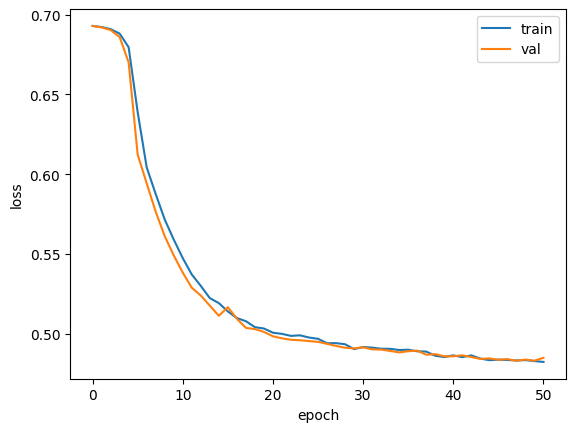

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('epoch')
plt.ylabel('loss')

plt.legend(['train','val'])

plt.show()

In [12]:
model3=keras.Sequential()
model3.add(keras.layers.Embedding(300,16,input_length=100))
model3.add(keras.layers.LSTM(8,dropout=0.3,return_sequences=True))
model3.add(keras.layers.LSTM(8,dropout=0.3))
model3.add(keras.layers.Dense(1,activation='sigmoid'))

In [13]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           4800      
                                                                 
 lstm_3 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_4 (LSTM)               (None, 8)                 544       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 6153 (24.04 KB)
Trainable params: 6153 (24.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 31s 85ms/step - loss: 0.6928 - accuracy: 0.5314 - val_loss: 0.6925 - val_accuracy: 0.5456
Epoch 2/100
  1/313 [..............................] - ETA: 40s - loss: 0.6932 - accuracy: 0.5156

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 28s 89ms/step - loss: 0.6918 - accuracy: 0.5641 - val_loss: 0.6911 - val_accuracy: 0.5756
Epoch 3/100
313/313 [==============================] - 27s 86ms/step - loss: 0.6889 - accuracy: 0.6027 - val_loss: 0.6851 - val_accuracy: 0.6392
Epoch 4/100
313/313 [==============================] - 28s 91ms/step - loss: 0.6700 - accuracy: 0.6526 - val_loss: 0.6392 - val_accuracy: 0.6790
Epoch 5/100
313/313 [==============================] - 25s 81ms/step - loss: 0.6184 - accuracy: 0.6814 - val_loss: 0.5986 - val_accuracy: 0.6992
Epoch 6/100
313/313 [==============================] - 25s 81ms/step - loss: 0.5926 - accuracy: 0.6965 - val_loss: 0.5762 - val_accuracy: 0.7118
Epoch 7/100
313/313 [==============================] - 26s 82ms/step - loss: 0.5729 - accuracy: 0.7128 - val_loss: 0.5605 - val_accuracy: 0.7186
Epoch 8/100
313/313 [==============================] - 26s 82ms/step - loss: 0.5571 - accuracy: 0.7240 - val_loss: 0.5482 - val_accuracy: 0.72

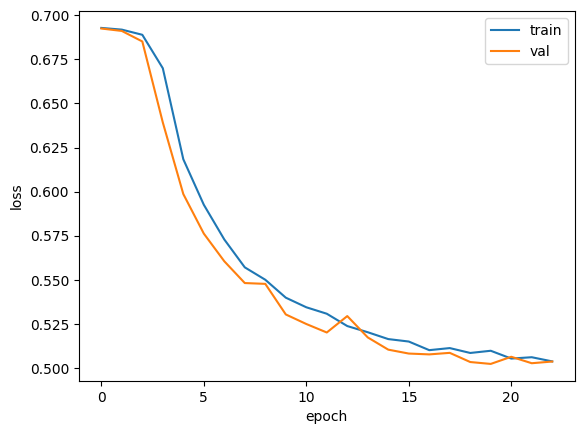

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('epoch')
plt.ylabel('loss')

plt.legend(['train','val'])

plt.show()

In [17]:
model4=keras.Sequential()
model4.add(keras.layers.Embedding(300,16,input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1,activation='sigmoid'))

In [18]:
model4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 16)           4800      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 5433 (21.22 KB)
Trainable params: 5433 (21.22 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 18s 50ms/step - loss: 0.6925 - accuracy: 0.5211 - val_loss: 0.6918 - val_accuracy: 0.5252
Epoch 2/100
  2/313 [..............................] - ETA: 19s - loss: 0.6951 - accuracy: 0.4453

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 15s 46ms/step - loss: 0.6910 - accuracy: 0.5408 - val_loss: 0.6902 - val_accuracy: 0.5414
Epoch 3/100
313/313 [==============================] - 14s 45ms/step - loss: 0.6888 - accuracy: 0.5563 - val_loss: 0.6875 - val_accuracy: 0.5668
Epoch 4/100
313/313 [==============================] - 14s 45ms/step - loss: 0.6856 - accuracy: 0.5774 - val_loss: 0.6839 - val_accuracy: 0.5724
Epoch 5/100
313/313 [==============================] - 14s 45ms/step - loss: 0.6809 - accuracy: 0.5881 - val_loss: 0.6782 - val_accuracy: 0.5870
Epoch 6/100
313/313 [==============================] - 14s 45ms/step - loss: 0.6740 - accuracy: 0.5993 - val_loss: 0.6702 - val_accuracy: 0.5996
Epoch 7/100
313/313 [==============================] - 15s 47ms/step - loss: 0.6641 - accuracy: 0.6137 - val_loss: 0.6577 - val_accuracy: 0.6222
Epoch 8/100
313/313 [==============================] - 15s 49ms/step - loss: 0.6482 - accuracy: 0.6333 - val_loss: 0.6378 - val_accuracy: 0.64

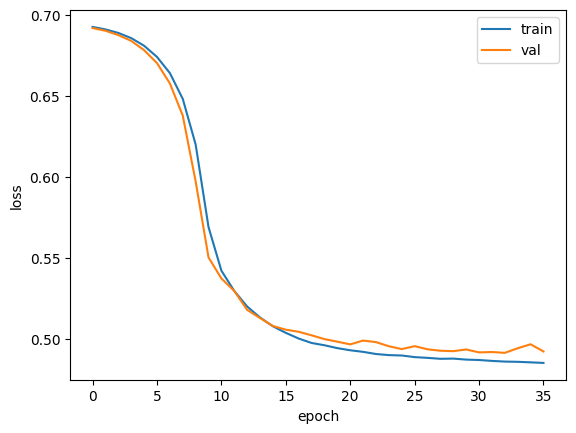

In [20]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('epoch')
plt.ylabel('loss')

plt.legend(['train','val'])

plt.show()
